# Bias

"A statistic is biased if, in the long run, it consistently over- or under-estimates the parameter it is estimating. More technically it is biased if it's expected value is not equal to the parameter. A stop watch that is a little bit fast gives biased estimates of elapsed time. Bias in this sense is different from the notion of a biased sample. A statistic is positively biased if it tends to over-estimate the parameter; a statistic is negatively-biased if it tends to under-estimate the parameter."

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 14, 10

## Location and scale

The $\mu$ (mu) symbol typically represents the mean, while the $\sigma$ (sigma) symbol typically represents the standard deviation. A smaller mean results in a peak further to the left, while a smaller standard deviation results in a steeper curve. The standard deviation is $\sigma$ multiplied by 3, so for the blue and green curves, which both peak at zero, 95% of it's value will lie between -3 and 3.

These curves are known as the Probability Density Function.

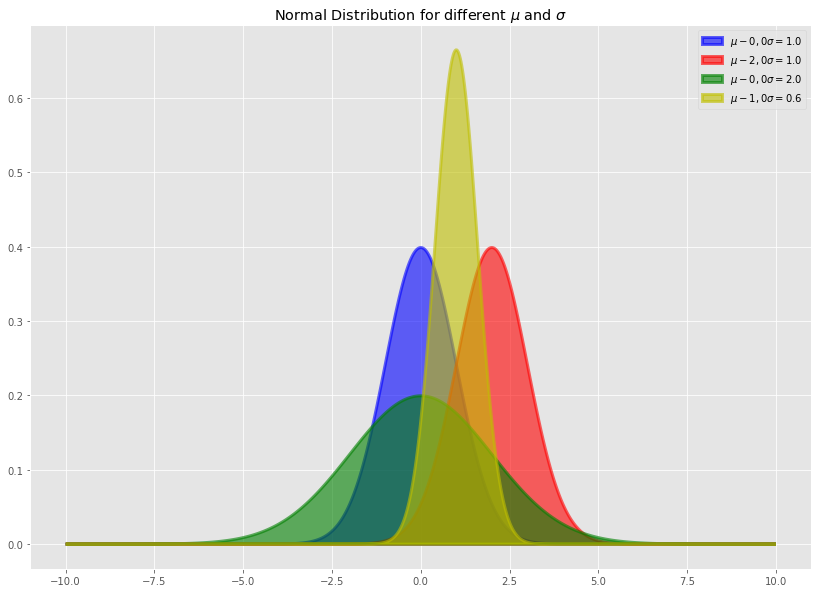

In [2]:
x = np.linspace(-10.0, 10.0, 1000)

plt.fill(x, ss.norm.pdf(x, loc=0.0, scale=1.0), label='$\mu - 0,0 \sigma = 1.0$', c='b', alpha=0.6, lw=3.0)
plt.fill(x, ss.norm.pdf(x, loc=2.0, scale=1.0), label='$\mu - 2,0 \sigma = 1.0$', c='r', alpha=0.6, lw=3.0)
plt.fill(x, ss.norm.pdf(x, loc=0.0, scale=2.0), label='$\mu - 0,0 \sigma = 2.0$', c='g', alpha=0.6, lw=3.0)
plt.fill(x, ss.norm.pdf(x, loc=1.0, scale=0.6), label='$\mu - 1,0 \sigma = 0.6$', c='y', alpha=0.6, lw=3.0)

plt.title('Normal Distribution for different $\mu$ and $\sigma$')
plt.legend();

## Probability

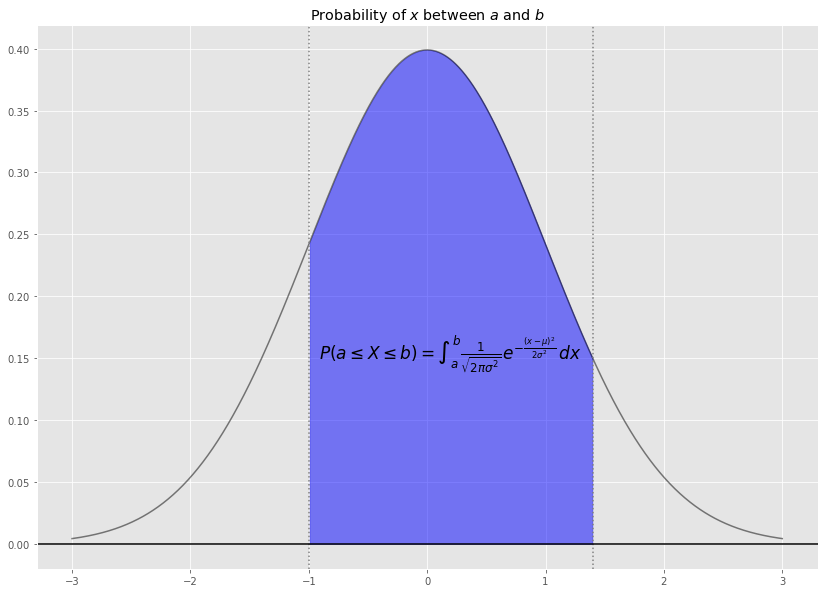

In [4]:
x = np.linspace(-3.0, 3.0, 1000)
y = ss.norm.pdf(x, loc=0.0, scale=1.0)

xseg = x[np.logical_and(-1.0 < x, x < 1.4)]
yseg = y[np.logical_and(-1.0 < x, x < 1.4)]

plt.plot(x, y, color='k', alpha=0.5)
plt.fill_between(xseg, yseg, color='b', alpha=0.5)
plt.axvline(x=-1.0, color='grey', linestyle=':')
plt.axvline(x= 1.4, color='grey', linestyle=':')

plt.text(0.2, 0.15, 
         r'$P (a \leq X \leq b) = \int_a^b \frac{1}{\sqrt{2\pi\sigma^2} } e^{ -\frac{(x-\mu)^2}{2\sigma^2} } \, dx$', 
         horizontalalignment='center', size=17)

plt.axhline(y=0.0, color='black',linestyle='-')

plt.title('Probability of $x$ between $a$ and $b$');

In normal language, this is, stated by Ian:

    Integrate [the weird symbol after the equals sign] over
        1 divided by 
            square root of 2 pi multiplied by sigma, squared
        multiplied by e to the power of
            negative
                square of
                    x minus mu
            divided by
                square of
                    2 multiplied by sigma
    
Where mu is, as stated earlier, the mean of the distribution, and sigma is the variance (times 3 to get standard deviation).

[Integration](https://www.mathsisfun.com/calculus/integration-introduction.html)

In [ ]:
x = np.linspace(-5.0, 5.0, 10000)
plt.plot(x, ss.norm.pdf(x, loc=0.0, scale=1.0), 'k-', lw=1.0)

xseg = x[np.logical_and(-5.0 <= x , x <= -3.0)]
plt.fill_between(xseg, ss.norm.pdf(xseg), color='y', alpha=0.5, linewidth=0)